# Kaggle Titanic survival - TensorFlow neural net

TIP - this workbook contains extensive text to explain the code.  To save you having to constantly scroll up and down to refer back, if you're using VSCode you can right click on the notebook's name tab at the top and click one of the split options (e.g. "Split Right") to see have a second view of the same notebook that you can scroll independently.

In this workbook we build a neural network to predict passenger survival on the Titanic, using the same dataset we used for the Logistic Regression example. The two common frameworks used for neural networks are TensorFlow and PyTorch. Both are excellent frameworks. TensorFlow frequently requires fewer lines of code, but PyTorch is more natively "Pythonic" in its syntax. Here we use TensorFlow and Keras which is integrated into TensorFlow and makes it simpler and faster to build TensorFlow models.

**You should install and switch to the supplied tf_hsma environment for this exercise.  This environment contains an installation of TensorFlow version 2.16.1 which you will need.**

## The neural network unit - a neuron or perceptron

The building block of a neural network is a neuron, which is essentially the same as the 'perceptron' described by Frank Rosenblatt in 1958.

The neuron, or perceptron, takes inputs *X* and weights *W* (each individual input has a weight; a bias weight is also introduced by creating a dummy input with value 1). The neuron sums the *input* multiplied by the *weight* and passes the output to an activation function. The simplest activation function is a step function, whereby if the output is >0 the output of the activation function is 1, otherwise the output is 0.

![](./images/perceptron.jpeg)

## Neural networks

Having understood a neuron - which calculates the weighted sum of its inputs and passes it through an activation function, neural networks are easy(ish)!

They are 'just' a network of such neurons, where the output of one becomes one of the inputs to the neurons in the next layer.

This allows any complexity of function to be mimicked by a neural network (so long as the network includes a non-linear activation function, like ReLU - see below).

Note the output layer may be composed of a single neuron, to predict a single value or single probability, or may be multiple neurons, to predict multiple values or multiple probabilities.

![](./images/net_1.png)


## Activation functions

Each neuron calculates the weighted sum of its inputs and passes that sum to an activation function. The two simplest functions are:

* *Linear*: The weighted output is passed forward with no change.

* *Step*: The output of the activation function is 0 or 1 depending on whether a threshold is reached.

Other common activation functions are:

* *Sigmoid*: Scales output 0-1 using a logistic function. Note that our simple single perceptron becomes a logistic regression model if we use a sigmoid activation function. The sigmoid function is often used to produce a probability output at the final layer.

* *tanh*: Scales output -1 to 1. Commonly used in older neural network models. Not commonly used now.

* *ReLU (rectifying linear unit)*: Simply converts all negative values to zero, and leaves positive values unchanged. This very simple method is very common in deep neural networks, and is sufficient to allow networks to model non-linear functions.

* *Leaky ReLU* and *Exponential Linear Unit (ELU)*: Common modifications to ReLU that do not have such a hard constraint on negative inputs, and can be useful if we run into the Dying ReLU problem (in which - typically due to high learning rates - our weights are commonly set to negative values, leading to them effectively being switched off (set to 0) under ReLU). Try them out as replacements to ReLU.

* *Maxout*: A generalised activation function that can model a complex non-linear activation function. 

* *SoftMax*: SoftMax is the final layer to use if you wish to normalise probability outputs from a network which has multiple class outputs (e.g. you want the total of your probabilities for "this is dog", "this is a cat", "this is a fish" etc to add up to 1).

![](./images/activation.png)

## Loss functions

Loss functions are critical to neural networks as they provide the measure by which the neural network is in error, allowing modification of the network to reduce error.

The most common loss functions are:

* *Mean Squared Error Loss*: Common loss function for regression (predicting values rather than class).

* *Cross Entropy Loss*: Common loss function for classification. *Binary Cross Entropy Loss* is used when the output is a binary classifier (like survive/die in the Titanic model).

## How do neural networks learn? Backpropagation and optimisation

*Backpropagation* is the process by which the final loss is distributed back through the network, allowing each weight to be updated in proportion to its contribution to the final error.

For more on backpropagation see: https://youtu.be/Ilg3gGewQ5U

For deeper maths on backpropagation see: https://youtu.be/tIeHLnjs5U8

*Optimisation* is the step-wise process by which weights are updated. The basic underlying method, *gradient descent*, is that weights are adjusted in the direction that improves fit, and that weights are adjust more when the gradient (how much the output changes with each unit change to the weight) is higher.

Common optimisers used are:

* *Stochastic gradient descent*: Updates gradients based on single samples. Can be inefficient, so can be modified to use gradients based on a small batch (e.g. 8-64) of samples. *Momentum* may also be added to avoid becoming trapped in local minima.

* *RMSprop*: A 'classic' benchmark optimiser. Adjusts steps based on a weighted average of all weight gradients.

* *Adam*: The most common optimiser used today. Has complex adaptive momentum for speeding up learning.

For more on optimisers see: https://youtu.be/mdKjMPmcWjY

## Training a neural network - the practicalities

The training process of a neural network consists of three general phases which are repeated across all the data. All of the data is passed through the network multiple times (the number of iterations, which may be as few as 3-5 or may be 1000+) until all of the data has been fed forward and backpropogated - this then represents an "Epoch". The three phases of an iteration are :

1. Pass training X data to the network and predict y

1. Calculate the 'loss' (error) between the predicted and observed (actual) values of y

1. Backpropagate the loss and update the weights (the job of the optimiser).

The learning is repeated until maximum accuracy is achieved (but keep an eye on accuracy of test data as well as training data as the network may develop significant over-fitting to training data unless steps are taken to offset the potential for over-fitting, such as use of 'drop-out' layers described below).

## Architectures

The most common fully connected architecture design is to have the same number of neurons in each layer, and adjust that number and the number of layers. This makes exploring the size of the neural net relatively easy (if sometimes slow). 

As a rough guide - the size of the neural net should be increased until it over-fits data (increasing accuracy of training data with reducing accuracy of test data), and then use a form of *regularisation* to reduce the over-fitting (we will go through this process below).

Some common architecture designs, which may be mixed in a single larger network, are:

* *Fully connected*: The output of each neuron goes to all neurons in the next layer.

* *Convolutional*: Common in image analysis. Small 'mini-nets' that look for patterns across the data - like a 'sliding window', but that can look at the whole picture at the same time. May also be used, for example, in time series to look for fingerprints of events anywhere in the time series.

* *Recurrent*: Introduce the concept of some (limited) form of memory into the network - at any one time a number of input steps are affecting the network output. Useful, for example, in sound or video analysis.

* *Transformers*: Sequence-to-sequence architecture. Convert sequences to sequences (e.g. translation).  Big in Natural Language Processing - we'll cover them in the NLP module.

* *Embedding*: Converts a categorical value to a vector of numbers, e.g. word-2-vec converts words to vectors such that similar meaning words are positioned close together.

* *Encoding*: Reduce many input features to fewer. This 'compresses' the data. De-coding layers may convert back to the original data.

* *Generative*: Rather than regression, or classification, generative networks output some form of synthetic data (such as fake images; see https://www.thispersondoesnotexist.com/).

For the kind of classification problem we're looking at here, a Fully Connected Neural Network is the most commonly used architecture now, and typically you keep all layers the same size (the same number of Neurons) apart from your output layer.  This makes it easy to test different sizes of network.


## Additional resources

Also see the excellent introductory video (20 minutes) from 3brown1blue: https://youtu.be/aircAruvnKk

## Let's go !!!!!!!!!!!!!

In this first cell, we're going to be a bit naughty, and turn off warnings (such as "you're using an out-of-date version of this" etc).  This will make the notebook cleaner and easier to interpret as you learn this, but in real-world work you shouldn't really do this unless you know what you're doing.  But we'll do it here because we do (I think).

Don't forget to select the tf_hsma environment when you run the first cell.  If you're prompted that you need to install the ipykernel, click that you want to do it.

In [1]:
# Turn warnings off to keep notebook tidy
import warnings
warnings.filterwarnings("ignore")

## Load modules

First we need to import the packages we're going to use.  The first three (MatPlotLib, NumPy and Pandas) are the stuff we use in pretty much everything in data science.  From SciKitLearn, we import functions to automatically split our data into training and test data (as we did for the Logistic Regression example) and to min-max normalise our data (remember we said that normalising our data is typical with Neural Networks ("Neural Networks are Normal"), and standardising our data - what we did last time - is typical with Logistic Regression).  Remember, when we normalise we'll scale all our feature values so they fall between 0 and 1.

Then, we import a load of things we'll need from TensorFlow (and particularly Keras).  TensorFlow is the Neural Network architecture developed by Google, but the interface (API) for TensorFlow is not easy to use.  So instead, we use Keras, which sits on top of TensorFlow, and allows us to interact with TensorFlow in a much more straightforward way.  Don't worry about what each of things that we import are at this stage - we'll see them in use as we move through the notebook.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# sklearn for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# TensorFlow sequential model
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

## Download data if not previously downloaded

This cell downloads the Titanic data that we're going to use.  You don't need to do this if you've already downloaded the data, but if you're unsure, run the cell anyway (it takes seconds!).

In [3]:
download_required = True

if download_required:

    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '1804_python_healthcare/master/titanic/data/processed_data.csv'

    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='./data/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data
    data.to_csv(data_directory + 'processed_data.csv', index=False)

## Define function to scale data

In neural networks it is common to normalise (scale input data 0-1) rather than use standardise (subtracting mean and dividing by standard deviation) each feature.  As with the Logistic Regression example, we'll set up a function here that we can call whenever we want to do this (the only difference being that in the Logistic Regression example we standardised our data, rather than normalising it).

In [4]:
def scale_data(X_train, X_test):
    """Scale data 0-1 based on min and max in training set"""

    # Initialise a new scaling object for normalising input data
    sc = MinMaxScaler()

    # Apply the scaler to the training and test sets
    train_sc = sc.fit_transform(X_train)
    test_sc = sc.fit_transform(X_test)

    return train_sc, test_sc

## Load data

We're going to load up and do a bit of initial prep on our data, much as we did before for the Logistic Regression.  We're going to load our data (which is stored in a .csv file) into a Pandas DataFrame.  We'll convert all the data into floating point numbers so everything is consistent.  We'll drop the Passenger ID column, as that isn't part of the original data, and we don't want the machine to learn anything from this.

Then we define our input (X) and output (y) data.  Remember we're trying to predict y from X.  X is all of our columns (features) except for the "Survived" column (which is our label - the thing we're trying to predict).  The `axis=1` argument tells Pandas we're referring to columns when we tell it to drop stuff.

We also set up NumPy versions of our X and y data - this is a necessary step if we were going to do k-fold splits (remember we talked about those in the last session - it's where we split up our data into training and test sets in multiple different ways to try to avoid biasing the data) as it requires the data to be in NumPy arrays, not Pandas DataFrames.  We're not actually going to use k-fold splits in this workbook, but we'll still go through the step of getting the data into the right format for when we do.  Because, in real world applications, you *should* use k-fold splits.

In [5]:
data = pd.read_csv('data/processed_data.csv')
# Make all data 'float' type
data = data.astype(float)
data.drop('PassengerId', inplace=True, axis=1)
X = data.drop('Survived',axis=1) # X = all 'data' except the 'survived' column
y = data['Survived'] # y = 'survived' column from 'data'
# Convert to NumPy as required for k-fold splits
X_np = X.values
y_np = y.values

# Set up neural net

We're going to put construction of the neural net into a separate function, which is what we've written in this next cell.  The function that we've written will build a network of any size, but the one we set up here will be relatively simple.  As you read each bit in this description, you should scroll down to look at the corresponding code in the next cell.

Here we use the `sequential` method to set up a TensorFlow neural network. This simpler method assumes each layer of the Neural Network occurs in sequence (one layer of neurons feeds into the next layer of neurons etc).  There are more complex architectures, but the simple sequential architecture is common.  Though simpler, it lacks some flexibility.  But don't worry about that for the moment.

The inputs into the function are as follows :

- The number of features in our input data (the columns of data from which we hope to make a prediction)
- The number of hidden layers - these are the layers between our input layer and our output layer.  Determining how many works best for your problem is a bit of an art-form, but you'll probably find something between 1 and 7 hidden layers works well for classification problems.  We set a default of 3, so if we don't specify a number when calling the function, it'll default to 3 hidden layers. (The assignment operator `=` denotes we are specifying a default value)
- The number of neurons in each hidden layer.  We default to 128 if no number is specified when the function is called.
- The dropout rate (the proportion of neurons that will be randomly "switched off" in each epoch to try to prevent overfitting.  We default to no dropout if no value is specified when the function is called.
- A learning rate, that will be used by the optimiser to determine how much it should change each time in response to the estimated error.  In other words, how sensitive will it be.  As with most things in a Neural Network, you will spend a lot of time playing around with these parameters to see if it improves things, but a good default is 0.003 (although for some non-Adam optimisers, that can be considered quite high, so you might want to try much lower learning rates to see if they help).  We use 0.003 as the default if no value is specified when the function is called.

In the function, we first clear the session.  There used to be issues with TensorFlow keeping old models hanging around in memory - whilst it probably isn't an issue now, we still do it just to be on the safe side.

Then we create a new Sequential Neural Network.

Next, we use a loop to set up the hidden layers of our network (the input layer is added automatically and we don't need to explicitly define it).  For each pass of the *for loop* (you'll see we go around the loop the number of times we have passed in as being the number of hidden layers we want) we :

- Add a fully-connected (dense) layer (one in which all of the neurons in the layer are connected to all of the neurons in the next layer), using the ReLU activation function for its neurons (you could of course change this to another activation function of your choosing)
- Add a dropout layer, to enable dropout

So, we end up with a set of fully-connected layers, each with a dropout layer after it.

Once we've added all our hidden layers we then add our final output layer.  Here, we add a densely connected output layer with 1 neuron (which will calculate the output - the prediction) using the Sigmoid activation function (because we want our output to be a kind of "likelihood" of it being a classified as a '1' - whatever that represents in our model.  By default, anything over 0.5 will be classified as 1, whilst everything else will be classified as 0).  Note of caution - do not interpret this number as being a probability that something belongs to a certain class, it's subtly different (so for example, you shouldn't see that a passenger has an output value of 0.6, and interpret that that they had a 60% probability of survival.  That's NOT correct.  Rather, the model has classified them as likely a survivor with a small amount of confidence (it's only just past the threshold of 0.5)).

Next we add our optimiser engine.  Remember - if in doubt, use Adam :)

Then we "compile" the Neural Network (this is just a fancy way of saying we'll tell TensorFlow to build what we've set up above).  When we tell it to compile, we tell it the loss function we want to use (here - binary crossentropy, because it's a classification problem with two possible outputs - for the Titanic problem, this is "survived" or "died").  We also specify the metrics that we want TensorFlow to monitor as the model is being "fitted" (learning) - here we tell it to monitor accuracy.

Finally, we get the function to return the network so we can use it (remember - the purpose of this function is to build a network to our specifications when we call it).

In [6]:
def make_net(number_features,
             hidden_layers=3,
             hidden_layer_neurones=128,
             dropout=0.0,
             learning_rate=0.003):

    """Make TensorFlow neural net"""

    # Clear Tensorflow
    K.clear_session()

    # Set up neural net
    net = Sequential()

    # Add hidden hidden_layers using a loop
    for i in range(hidden_layers):
        # Add fully connected layer with ReLu activation
        net.add(Dense(
            hidden_layer_neurones,
            input_dim=number_features,
            activation='relu'))
        # Add droput layer
        net.add(Dropout(dropout))

    # Add final sigmoid activation output
    net.add(Dense(1, activation='sigmoid'))

    # Compiling model
    opt = Adam(learning_rate=learning_rate)

    net.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    return net

## Show summary of the model structure

Here we will create an arbitrary model (that we won't use) with 10 input features, just to show the function we wrote above being used and so you can see how you can use the summary() function of a model to see an overview of the structure of it.

We can see what the layers are in order.  Remember we have five main layers in total (input, 3 x hidden, output) but you won't see the input layer here.  When you run the below cell, you should see three hidden layers (each with a dropout layer immediately after) with 128 neurons in each layer followed by a final output layer with just one neuron.  You'll also see that there are over 34,500 parameters (weights) that it needs to optimise, just in a very simple network like this on a very small dataset with 10 features.  Now you can see why they're so complicated (and magical!).

In [7]:
model = make_net(10)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,561 (135.00 KB)

 Trainable params: 34,561 (135.00 KB)

 Non-trainable params: 0 (0.00 B)

## Split and Scale data

Now, as we did before with the Logistic Regression, we split our data into training and test sets.  We've got 25% carved off for our test set.  But what is this `random_state=42` thing?  So, pulling back the curtain now, but the random numbers we tend to generate in our computers are not *strictly* random.  They are *pseudo-random* - they use complex algorithms to generate numbers that appear random (and which are good enough for the vast majority of things you will ever do).  Because they are pseudo-random, this means that we can fix the random number generator to use a pre-defined *seed* - a number that feeds into the algorithm which will ensure we always get the same random numbers being generated.  This can be useful if we're 1) teaching, and you want everyone to get the same thing, or 2) validating our outputs whilst we build our model.  Since we're doing both of those things here, we use a fixed seed.

But why the number 42?  Those of you who have read, watched and / or listened to The Hitchiker's Guide to the Galaxy will know why.  Those that haven't, go off and read, watch or listen to it and then you'll get the "joke" (Computer Scientists love doing stuff like this..)

Once we've established our training and testing data, we scale the data by normalising it, using the function we wrote earlier (which uses min-max normalisation).

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_np, y_np, test_size = 0.25, random_state=42)

# Scale X data
X_train_sc, X_test_sc = scale_data(X_train, X_test)

Let's just have a look at the scaled data for the first two records (passengers) in our input data.  We *should* see that all of the feature values have scaled between 0 and 1.

In [9]:
X_train_sc[0:2]

array([[0.        , 0.34656949, 0.        , 0.        , 0.05953204,
        1.        , 0.        , 0.        , 0.828125  , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.30887158, 0.        , 0.        , 0.01376068,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ]])

We can compare this with the unscaled data for the same two passengers to see the original values.

In [10]:
X_train[0:2]

array([[  1.  ,  28.  ,   0.  ,   0.  ,  30.5 ,   1.  ,   0.  ,   0.  ,
        106.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
          0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  3.  ,  25.  ,   0.  ,   0.  ,   7.05,   0.  ,   0.  ,   1.  ,
          0.  ,   1.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ]])

## Function to calculate accuracy

We're now going to write a little function that will report the accuracy of the model on the training set and the test set.  This will help us assess how well our model is performing.  We pass into the function the model, the (normalised) input data for both the training and test sets, and the output data for both the training and test sets.

The function uses the `predict` function of the model to grab out the probability predictions based on the input data for the training set.  We specify that a classification of 1 (in the case of Titanic, this means "survived") should be made if the probability predicted is greater than 0.5.  Then we "flatten" the data to get it in the right shape (because it comes out as a complex shape - a tensor.  Don't worry about this.  Just imagine a blob of data, and we squish it so we can read it).  Then we use `y_pred_train == y_train` to return boolean `True` values for each time where the prediction (survived or died) matched the real answer, and take the average of those matches (that effectively gives us accuracy - what proportion of times did prediction match real answer).  (Python interprets Trues and Falses as 1s and 0s, in case you're wondering how that works!).

Then we do the same as above but for the test set.

Finally we print the accuracy on both the training and test sets.

In [11]:
def calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test):
    """Calculate and print accuracy of training and test data fits"""

    ### Get accuracy of fit to training data
    probability = model.predict(X_train_sc)
    y_pred_train = probability >= 0.5
    y_pred_train = y_pred_train.flatten()
    accuracy_train = np.mean(y_pred_train == y_train)

    ### Get accuracy of fit to test data
    probability = model.predict(X_test_sc)
    y_pred_test = probability >= 0.5
    y_pred_test = y_pred_test.flatten()
    accuracy_test = np.mean(y_pred_test == y_test)

    # Show acuracy
    print (f'Training accuracy {accuracy_train:0.3f}')
    print (f'Test accuracy {accuracy_test:0.3f}')

We'll also write a little function to plot the accuracy on the training set and the test set over time.  Keras keeps a "history" (which is a dictionary) of the learning which allows us to do this easily.  It's quite useful to plot the performance over time, as it allows us to look for indications as to when the model is becoming overfitted etc.

In our function, we'll grab out the values from the passed in history dictionary, and then plot them using standard matplotlib plotting methods.

In [12]:
def plot_training(history_dict):
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values) + 1)

    fig, ax = plt.subplots()

    ax.set_xlabel('Time')
    ax.set_ylabel('Accuracy')

    ax.plot(epochs, acc_values, color='blue', label='Training acc')
    ax.plot(epochs, val_acc_values, color='red', label='Test accuracy')
    ax.set_title('Training and validation accuracy')

    ax.legend()

    fig.show()

## Run the model

We've now defined everything that will allow us to build the model.  So we'll now define the model we want and train it!

To work out how many features we need (which we then need to pass into the `make_net` function we defined earlier), we can simply look at the number of columns in our X (input) data (where we've removed the 'label' (output) column).  We can grab this from the standardised training data, by looking at index 1 of the shape tuple (index 0 would be rows (passengers in the Titanic data), and index 1 would be columns).  We can see this if we run the code `X_train_sc.shape`.  Try it yourself (just insert a code cell below this markdown cell)!  You should see there are 668 rows, and 24 columns.  Therefore, we've got 668 passengers and 24 features.

Next we call our `make_net` function, passing in the number of features we calculated above.  This will create our Neural Network.  As we've passed in nothing else, we'll have defaults for the rest of the network - 3 hidden layers, 128 neurons per layer, a learning rate of 0.003 and no dropout (although, we will still have dropput layers, they just won't do anything).

Then, we fit (train) the model.  To do that, we call the `fit` method of the model, and pass it :

- the standardised training data
- the output (label) data
- the number of epochs (training generations - full passes of all of the data through the network).  Initially, we want enough epochs that we see overfitting start to happen (the training accuracy starts to plateau) because then we know we've trained "enough" (albeit a bit too much) and can then look to reduce it back a bit
- the batch size (how much data we shunt through the network at once.  Yann LeCun (French Computer Scientist) advises "Friends shouldn't let friends use batch sizes of more than 32".  But we will here... :))
- the data we want to use as our "validation data" (which we use to fine tune the parameters of the model).  Keras will check performance on this validation data.  Here we just use our test set, but you should really have a separate "validation set" that you'd use whilst tuning the model.
- whether we want to see all the things it's doing as it's learning.  If we set `verbose` to 0, all of this will be hidden (keeping things tidier), but as we're experimenting with our model, it's a good idea to set `verbose` to 1 so we can monitor what it's doing.

You'll also see that we not only call `model.fit` but we store the output of that function in a variable called `history`.  This allows us to access all the useful information that keras was keeping track of whilst the model was training.  We'll use that later.

Note - when you run the cell below, the model will be built and then start training.  How long this takes will depend on your computer specs, including whether you have a CUDA-enabled GPU (if you're running locally) or your priority in the queue for cloud computing (if you're running this on CoLab).

Dan has a very fast computer with a high performance CUDA-enabled GPU, and the below (with 250 epochs) takes about 6 seconds on the GPU and about 11 seconds on the CPU.  It might take a little while longer on yours - don't worry, as long as you can see it moving through the epochs.

For each epoch, you'll see various information, including the epoch number, the loss (error) that's been calculated in that epoch (for both the training and validation data), and the accuracy (for both the training and validation data).  You should see loss gradually reduce, and accuracy gradually increase.  But you'll likely see that training accuracy tends to keep getting better (before it reaches a plateau) and validation accuracy gets better but then starts to drop a bit.  That's a sign of overfitting (our model's become increasingly brilliant for the training data, but starting to get increasingly rubbish at being more generally useful).

In [13]:
# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features)

### Train model (and store training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=250,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=1)

Epoch 1/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6491 - loss: 0.6141 - val_accuracy: 0.7175 - val_loss: 0.5225
Epoch 2/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7830 - loss: 0.4792 - val_accuracy: 0.7803 - val_loss: 0.4805
Epoch 3/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7996 - loss: 0.4717 - val_accuracy: 0.7623 - val_loss: 0.4625
Epoch 4/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8054 - loss: 0.4543 - val_accuracy: 0.7937 - val_loss: 0.4553
Epoch 5/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8020 - loss: 0.4289 - val_accuracy: 0.8027 - val_loss: 0.4472
Epoch 6/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8162 - loss: 0.4076 - val_accuracy: 0.8161 - val_loss: 0.4540
Epoch 7/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8297 - loss: 0.4068 - val_accuracy: 0.8117 - val_loss: 0.4593
Epoch 8/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8347 - loss: 0.3793 - val_accuracy: 0.8027 - 

Let's calculate and print the final accuracy scores for both the training and test (validation) data.  Remember, we'll call the function we wrote to do this earlier.  You should see training accuracy is much better than test accuracy.  We've overfitted.  Don't worry - we'll try and improve that in a moment.

In [14]:
# Show acuracy
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training accuracy 0.927
Test accuracy 0.812


### Get training history

`history` is a dictionary containing data collected during training.  Remember - we stored it when we called the `model.fit()` method.  Let's take a look at the keys in this dictionary (these are the metrics monitored during training).

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

We see from the above that we have four keys in our history dictionary - loss, accuracy, validation loss and validation accuracy.

### Plot training history

Now let's plot our history data using the plotting function we wrote earlier.

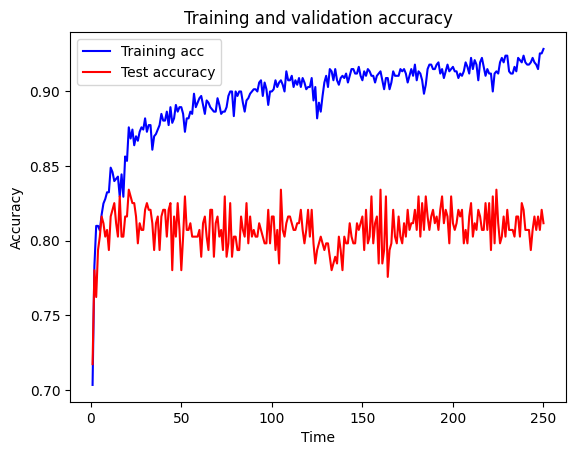

In [16]:
plot_training(history.history)

You should see from the plot above that the training accuracy gets better and better before reaching a plateau, but for the test data the accuracy initially improves, but then reduces a bit and plateaus at poorer performance.  As we thought, we've overfitted.  So let's look at how we can now try to reduce the overfitting.

## Improving fit by avoiding or reducing-over fitting

In the lecture, we discussed a number of strategies we can take to try to reduce overfitting.  Let's look at each in turn.

### 1) Reduce complexity of model

A simple initial strategy is to reduce the complexity of the model, so that the "dividing line" it learns becomes less complex (and less likely to be an overfit).

Here, we create a new model where we reduce the number of hidden layers to 1 (from the default we used of 3), and we reduce the number of neurons on each hidden layer to 32 (from the default we used of 128).

Then we fit (train) this new model, exactly as we did before.  We'll set `verbose` to 0 though, so we don't see everything as it trains (if you'd rather see it, just change `verbose` to 1 below).

In [17]:
# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features,
                hidden_layers=1,
                hidden_layer_neurones=32)

### Train model (and stote training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=250,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

Let's calculate, print and plot accuracy as we did before.

In [18]:
# Show acuracy
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training accuracy 0.883
Test accuracy 0.816


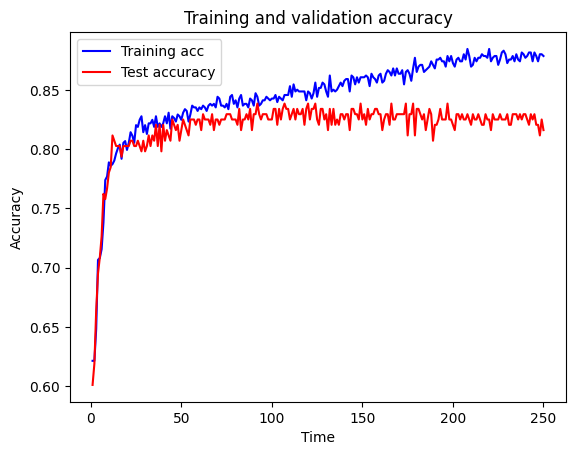

In [19]:
plot_training(history.history)

You should see that the simplification of the model above has improved things a bit (though it may not, there's randomness at play here, and your network may have learned differently) - training accuracy has reduced, but test accuracy (our measure of how generally useful our model will be beyond the training set) has improved - a little bit.  But there's still a bit of a gap between them - we're still overfitting.

### 2) Reduce training time

For the moment, let's do one change at a time, so we'll go back to our original model before trying our next strategy.

Another approach we can use is simply to stop training for so long.  We can see from our earlier plots that things improve in the test set initially but then reduces.  So, by not training for so long, we can stop training before it significantly overfits.

Here, we'll run the model exactly as we did the first time, except we'll only run it for 25 epochs, rather than 250 - just 10% of the original training time.

In [20]:
# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features)
### Train model (and stote training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=25,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

In [21]:
# Show acuracy
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
Training accuracy 0.876
Test accuracy 0.821


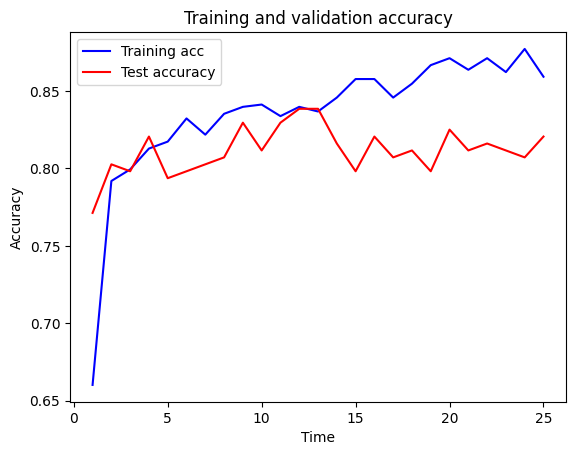

In [22]:
plot_training(history.history)

You should see that reducing the training time has also led to an improvement in test accuracy, much as simplifying the model did, although you might not.  You might find that this measure is slightly more effective than the simplifying measure.  You should also see from the plot that the test set accuracy tends to plateau, and it doesn't get to the bit where it starts dropping significantly.

### 3) Add dropout

Using dropout, in each training epoch a random selection of weights are "switched off" (the selection changes from epoch to epoch).  It does this by using the Dropout layers after each hidden layer (remember when we added those earlier?), and randomly switching some of the incoming weights to 0.  When predicting (after fitting) all weights are used.  Dropout ensures that, during training, the model can't rely too much on any set of weights (because they'll occasionally be turned off), and looks to explore them more globally.

This is probably the most common method for reducing overfitting.  Dropout values of 0.2 to 0.5 are common.

Here, we'll use a dropout value of 0.5.  So 50% of the weights coming out of each hidden layer will be set to 0 in each epoch.

In [23]:
# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features,
                dropout=0.5)

### Train model (and stote training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=250,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

In [24]:
# Show acuracy
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
Training accuracy 0.889
Test accuracy 0.798


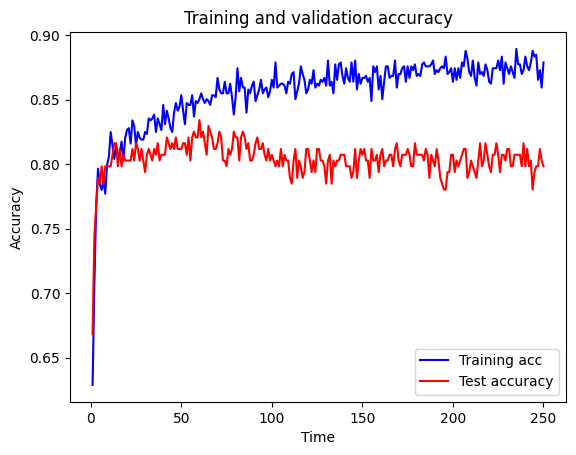

In [25]:
plot_training(history.history)

Again, we should see that Dropout has improved performance on the test set over the base case (although it might not).

### 4) Combination of the above and with automatic early stopping

Rather than just doing one of these things above, we tend to combine these measures.  We'll also use a Keras callback called EarlyStopping to automate the measure where we try to stop the training sooner.  A callback is simply a function that Keras can use to perform various actions continually throughout the training.

EarlyStopping will automatically stop the training when it appears the validation accuracy isn't getting any better.  It allows us to specify a `patience` level, which is the number of epochs we are prepared to wait (to give it a chance to improve) before EarlyStopping cuts things off.  We can also optionally specify the minimum level we want our metric(s) (e.g. accuracy) to improve between epochs to count as an "improvement" - this allows us to say that we don't consider a very small improvement as significant enough.  You'll see examples of this later in the course, but here we'll just specify `patience`, and we'll allow any improvement to count as improvement.

Here, we specify a `patience` of 25 epochs - this means that we are prepared to wait 25 epochs to see if we can get a better accuracy score on the validation set.  By setting `restore_best_weights=True` we tell it that, once it stops (if it didn't manage to improve things in 25 epochs), then it should roll back the network to how it was when it reached its peak performance.

So, here we set up our EarlyStopping callback.  Then we define a simpler network with 1 hidden layer and 64 neurons per layer, have a 50% dropout rate, and run for 250 epochs **but** add in the EarlyStopping callback so that Keras will stop the training when things stop improving in the validation set, and revert back to the best version it's seen.

In the below, you'll see we've also added another callback called ModelCheckpoint.  This callback just automatically saves the model at its best point so we can easily retrieve it.  In combination with EarlyStopping, this means we have a model that won't keep going beyond when it should, and it'll save the best version for later use.

Note that as well as creating and defining the callbacks, you also need to ensure you add them into the list of inputs you pass in when you call `model.fit`.

In [26]:
# Define save checkpoint callback (only save if new best validation results)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'model_checkpoint.keras', save_best_only=True)

# Define early stopping callback
# Stop when no validation improvement for 25 epochs
# Restore weights to best validation accuracy
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=25, restore_best_weights=True)

# Define network
number_features = X_train_sc.shape[1]
model = make_net(
    number_features,
    hidden_layers=1,
    hidden_layer_neurones=64,
    dropout=0.5)

### Train model (and stote training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=250,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0,
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [27]:
# Show accuracy
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
Training accuracy 0.838
Test accuracy 0.821


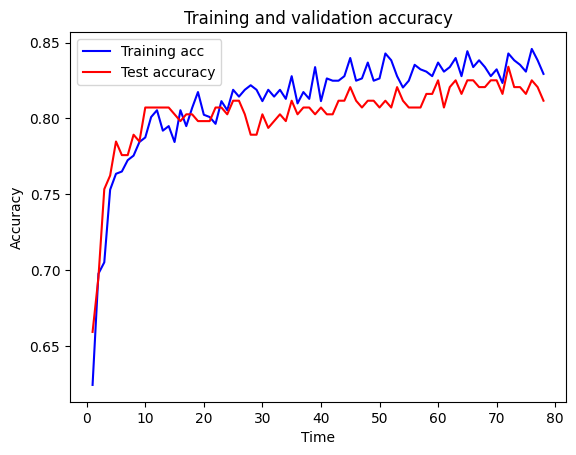

In [28]:
plot_training(history.history)

You should see from the above, where we've combined the three anti-overfitting measures, that we get quite a decent improvement in test accuracy and a closing of the gap between training and test accuracy.  This indicates that our model is far less overfitted than it was originally.

## Saving and reloading the model

Finally, we'll look at how we can save our models so we can come back to them another time, and we don't have to retrain them each time.  For a small model like this, it's not hugely inconvenient, but if we had a large model (that could take hours or even days to run) we don't want to have to retrain it every time we want to use it!

Here, we can use the `save()` function of the model to easily save a model.  We just pass in a filename - we use the new .keras file extension.  The model will be saved in the present working directory for the code.

You can also see in the cell below how to load a model back in, and then use it again.  You can verify this if you run the two cells below, which will save the model, then load it back up, and recalculate its accuracy - you should see that the reported training and test accuracies are the same as you had above (because that's the model we saved and then loaded back up).

In [29]:
# Save model
model.save('titanic_tf_model.keras')

# Load and use saved model - we need to first set up a model
restored_model = keras.models.load_model('titanic_tf_model.keras')

# Predict classes as normal
predicted_proba = restored_model.predict(X_test_sc)

# Show examples of predicted probability
print(predicted_proba[0:5].flatten())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[0.09657519 0.12534277 0.13036527 0.90095335 0.64894223]


In [30]:
calculate_accuracy(restored_model, X_train_sc, X_test_sc, y_train, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
Training accuracy 0.838
Test accuracy 0.821


# Model Explainability with Shap

If using the HSMA tf environment, we need to add shap in. 

In [31]:
!pip install shap

  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached numba-0.60.0-cp311-cp311-win_amd64.whl.metadata (2.8 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached llvmlite-0.43.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ---------- ----------------------------- 122.9/456.1 kB 3.5 MB/s eta 0:00:01
   ------------------------------------ --- 419.8/456.1 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 4.7 MB/s eta 0:00:00
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
Using cached numba-0.60.0-cp311-cp311-win_amd64.whl (2.7 MB)
Using cached llvmlite-0.43.0-cp311-cp311-win_amd64.whl (28.1 MB)


In [41]:
import shap
shap.initjs()

In [120]:
# explain the model's predictions using SHAP Kernel Explainer

explainer = shap.KernelExplainer(model, shap.sample(X_train, 250))

In [176]:
# Compute SHAP values for the test set
shap_values_raw_kernel = explainer.shap_values(X_test)
shap_values_raw_kernel

  0%|          | 0/223 [00:00<?, ?it/s]

100%|██████████| 223/223 [02:00<00:00,  1.86it/s]


array([[[-0.00248059],
        [ 0.00759006],
        [-0.0063797 ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.05191403],
        [ 0.03370633],
        [ 0.02459686],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.0017024 ]],

       [[-0.0376775 ],
        [ 0.284875  ],
        [ 0.03912417],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       ...,

       [[-0.03943836],
        [-0.10823223],
        [ 0.00904279],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.02719354],
        [ 0.05639177],
        [ 0.        ],
        ...,
        [ 0.00085186],
        [ 0.        ],
        [-0.0019275 ]],

       [[ 0.        ],
        [ 0.09487712],
        [-0.01033662],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]])

In [177]:
np.array([explainer.expected_value for x in range(len(X_test))])

array([[0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.73686917],
       [0.736

In [180]:
# Create an Explanation object
shap_values = shap.Explanation(
    values=np.squeeze(shap_values_raw_kernel),
    base_values=np.array([explainer.expected_value[0] for x in range(len(X_test))]),
    data=X_test,
    feature_names=X.columns
    )

In [181]:
shap_values

.values =
array([[-0.00248059,  0.00759006, -0.0063797 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05191403,  0.03370633,  0.02459686, ...,  0.        ,
         0.        ,  0.0017024 ],
       [-0.0376775 ,  0.284875  ,  0.03912417, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.03943836, -0.10823223,  0.00904279, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02719354,  0.05639177,  0.        , ...,  0.00085186,
         0.        , -0.0019275 ],
       [ 0.        ,  0.09487712, -0.01033662, ...,  0.        ,
         0.        ,  0.        ]])

.base_values =
array([0.73686917, 0.73686917, 0.73686917, 0.73686917, 0.73686917,
       0.73686917, 0.73686917, 0.73686917, 0.73686917, 0.73686917,
       0.73686917, 0.73686917, 0.73686917, 0.73686917, 0.73686917,
       0.73686917, 0.73686917, 0.73686917, 0.73686917, 0.73686917,
       0.73686917, 0.73686917, 0.73686917, 0.73686917, 0.73686917,
       0.73686917, 0.73686

## Table

In [201]:
# Get top 10 features

features = X.columns.to_list()

importances = pd.DataFrame(index=features)

importances['mean_shap_values'] = np.mean(shap_values.values, axis=0)

# Calculate mean absolute Shap value for each feature in training set
# This will give us the average importance of each feature
importances['mean_abs_shap_values'] = np.mean(
    np.abs(shap_values.values),axis=0)

importances.sort_values('mean_abs_shap_values', ascending=False)

,mean_shap_values,mean_abs_shap_values
Fare,-0.007968,0.248342
Age,-0.000455,0.089163
CabinNumber,0.006149,0.048916
male,-0.005759,0.041046
Pclass,0.000195,0.026976
SibSp,0.003520,0.010264
Parch,0.001578,0.006794
Embarked_Q,0.000592,0.006364
Embarked_C,0.000619,0.005198
Embarked_S,-0.000337,0.004780


## Beeswarm

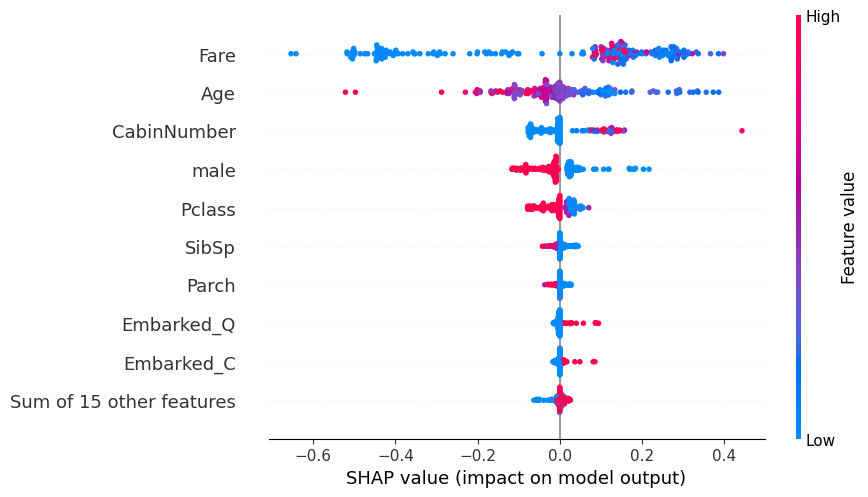

In [182]:
shap.plots.beeswarm(shap_values)

## Violin

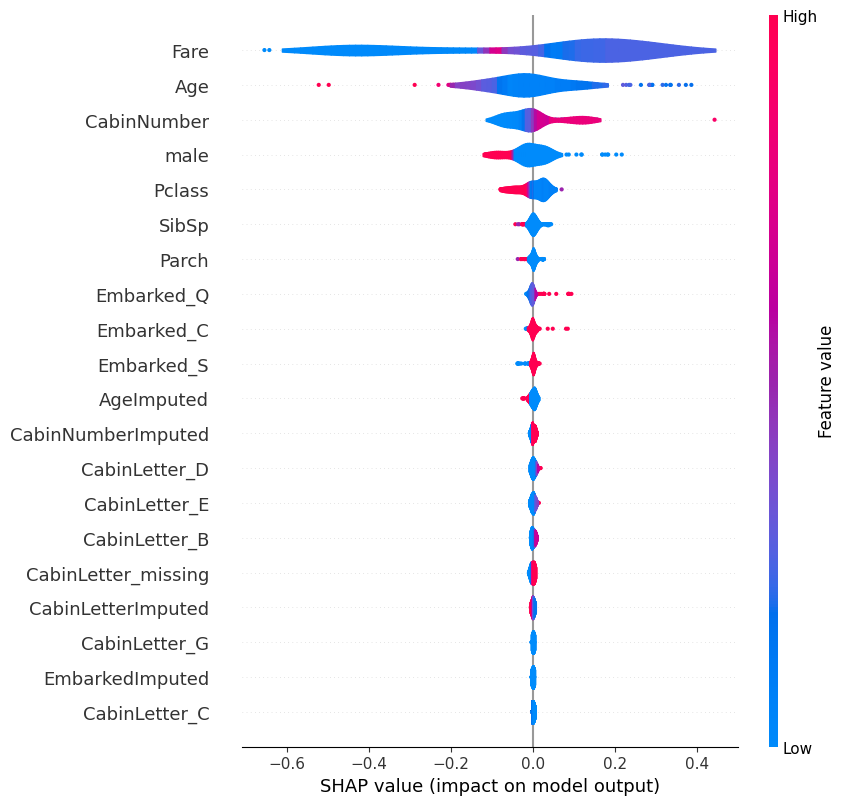

In [183]:
# summarize the effects of all the features
shap.plots.violin(shap_values)

## Bar

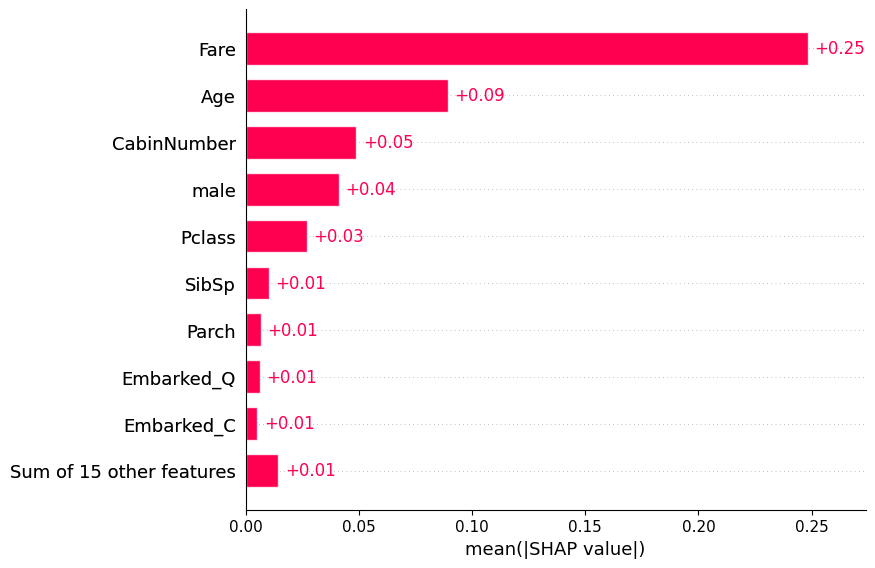

In [184]:
shap.plots.bar(shap_values)

## Dependence

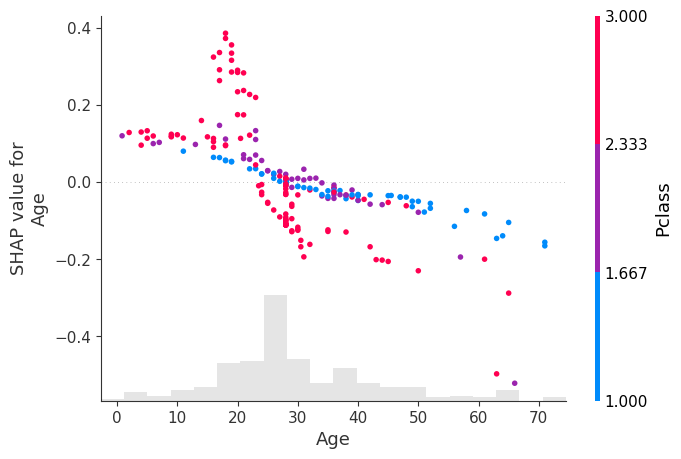

In [185]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Age"], color=shap_values)

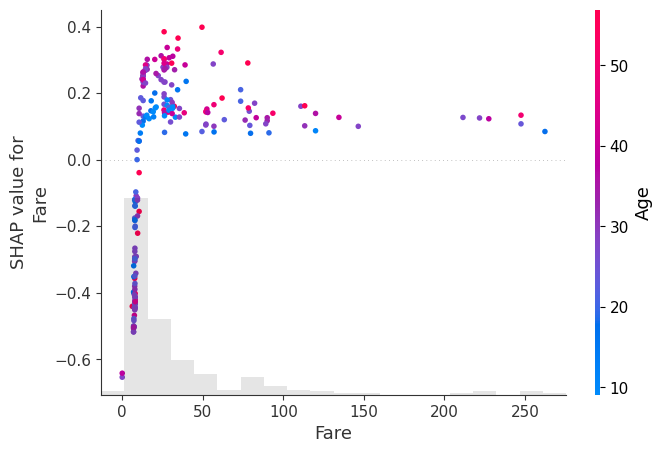

In [143]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Fare"], color=shap_values)

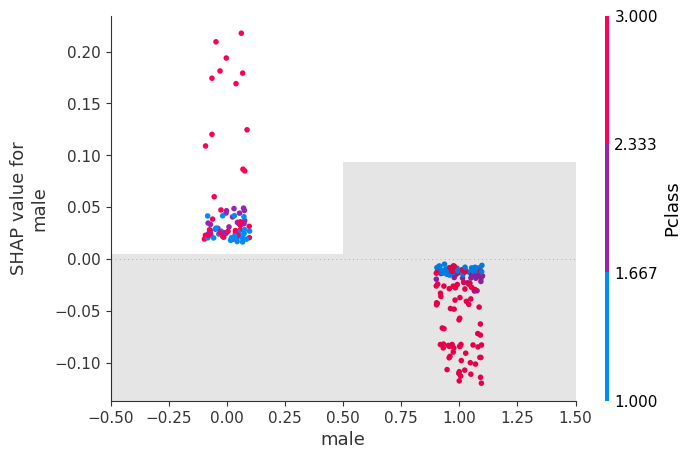

In [144]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "male"], color=shap_values)

## Waterfall

In [174]:
shap_values

.values =
array([[-0.00228119,  0.00722077, -0.00644112, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05294448,  0.0352557 ,  0.02807909, ...,  0.        ,
         0.        ,  0.00105365],
       [-0.03714294,  0.28271642,  0.04628346, ...,  0.        ,
         0.        , -0.00101677],
       ...,
       [-0.03827609, -0.11008725,  0.00904399, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02630411,  0.05710654,  0.00166543, ...,  0.00105344,
         0.        ,  0.00131595],
       [ 0.        ,  0.09516713, -0.01050836, ...,  0.        ,
         0.        ,  0.        ]])

.base_values =
array([0.73686917])

.data =
array([[ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 2., 31.,  0., ...,  0.,  0.,  1.],
       [ 3., 20.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  0., ...,  0.,  0.,  1.],
       [ 2., 24.,  0., ...,  0.,  0.,  1.],
       [ 3., 18.,  1., ...,  0.,  0.,  1.]])

In [187]:
shap_values[2]

.values =
array([-0.0376775 ,  0.284875  ,  0.03912417,  0.02744846, -0.20123832,
        0.01103369,  0.        ,  0.        , -0.03301797,  0.00577193,
       -0.06080716, -0.00624689, -0.01159587,  0.00966953, -0.00184868,
        0.        ,  0.        ,  0.        ,  0.        , -0.00373964,
        0.        ,  0.        ,  0.        ,  0.        ])

.base_values =
0.7368691716871151

.data =
array([ 3.   , 20.   ,  0.   ,  0.   ,  7.925,  0.   ,  0.   ,  1.   ,
        0.   ,  1.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ])

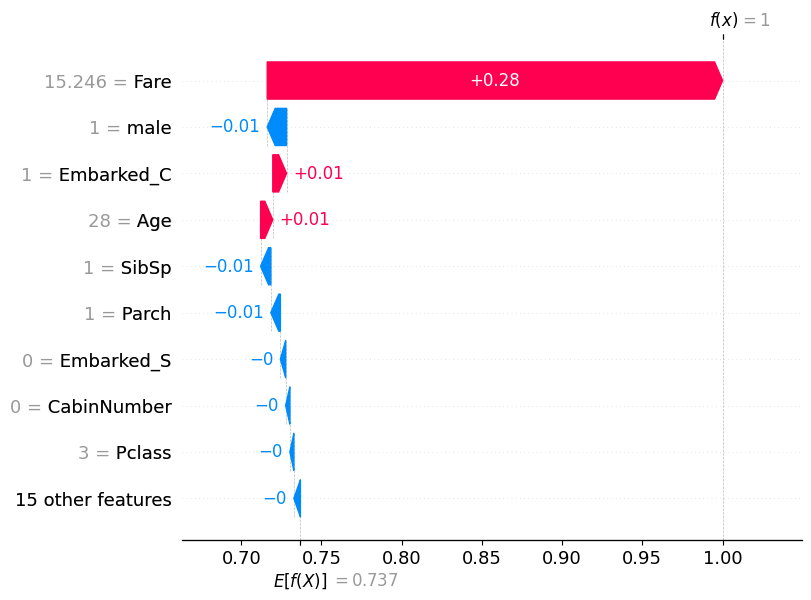

In [188]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

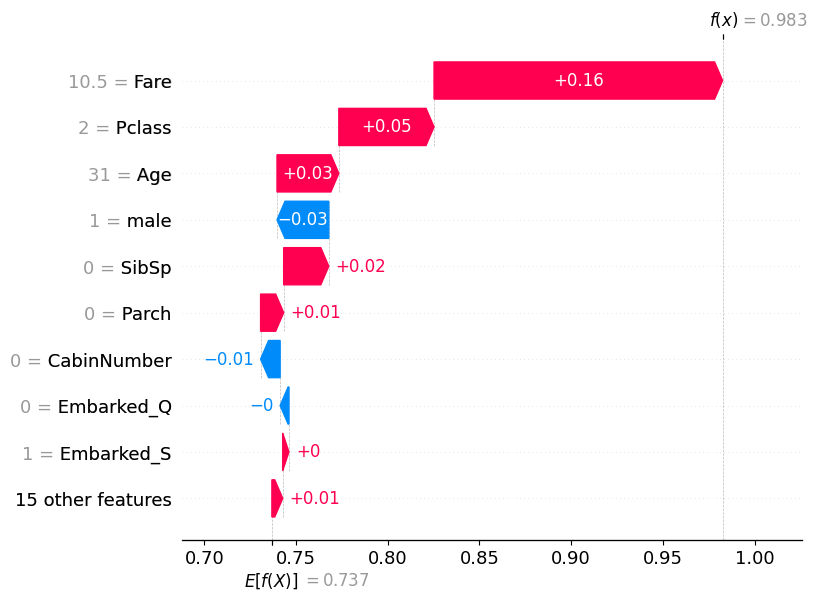

In [189]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

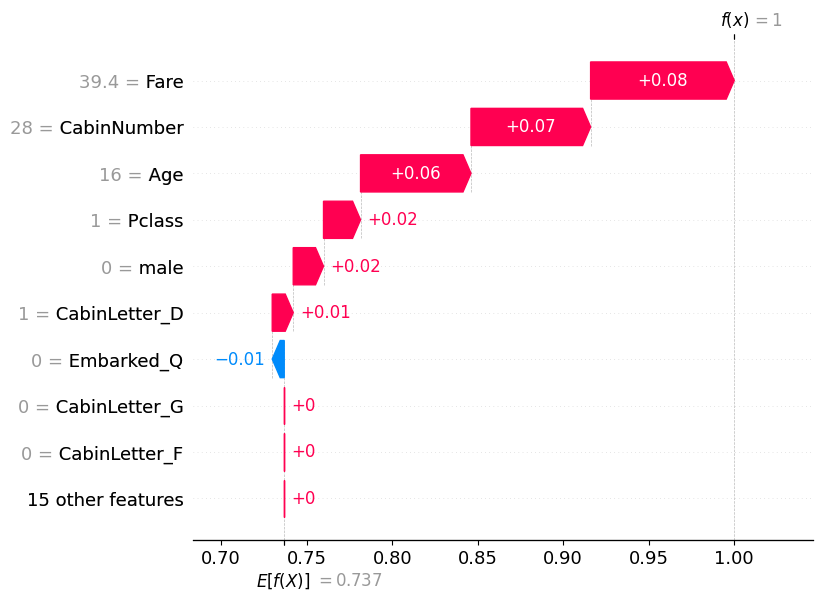

In [190]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[15])

## Force

In [191]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [193]:
shap.plots.force(shap_values[15])

### Global Force Plot

In [192]:
shap.plots.force(shap_values)

## Decision

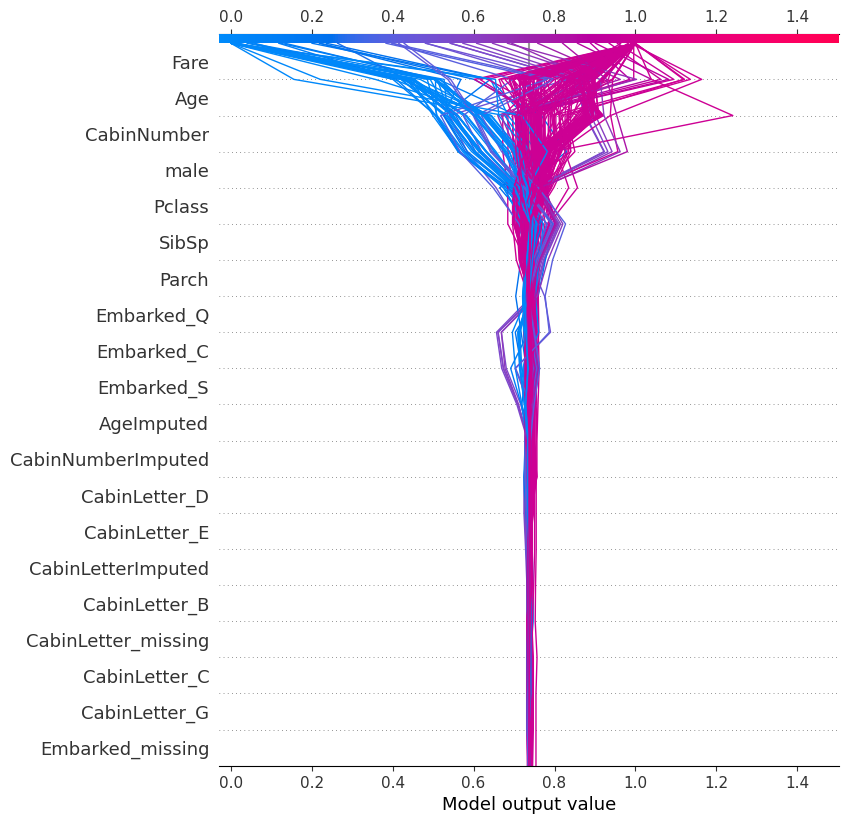

In [140]:
shap.plots.decision(
    explainer.expected_value,
    shap_values.values,
    feature_names=X.columns.tolist()
    )

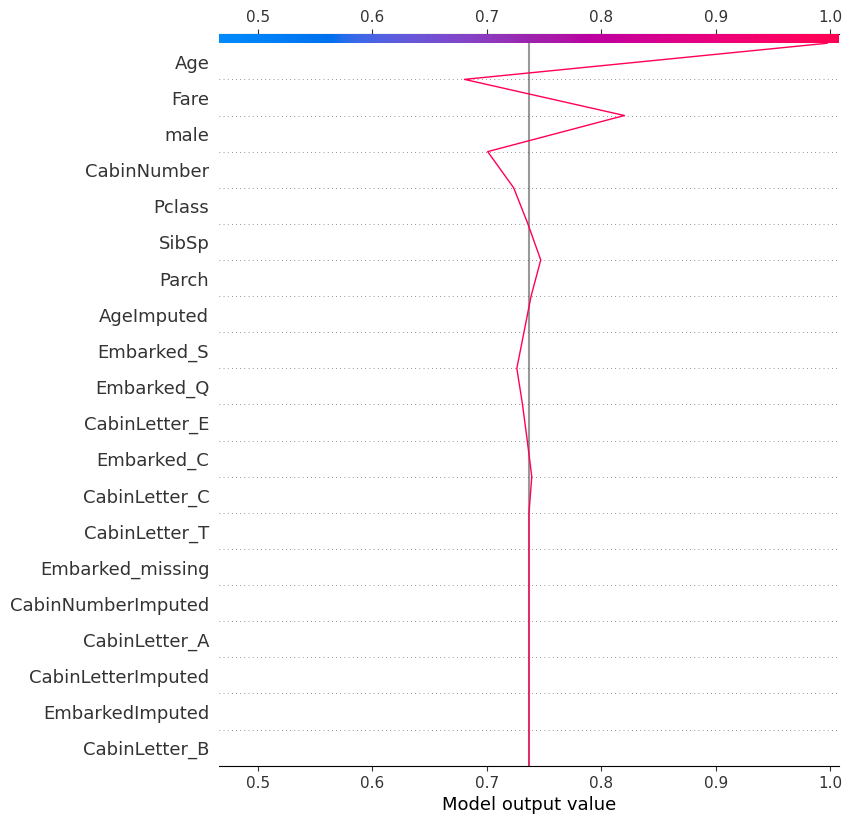

In [195]:
shap.plots.decision(
    explainer.expected_value,
    shap_values.values[22],
    feature_names=X.columns.tolist()
    )

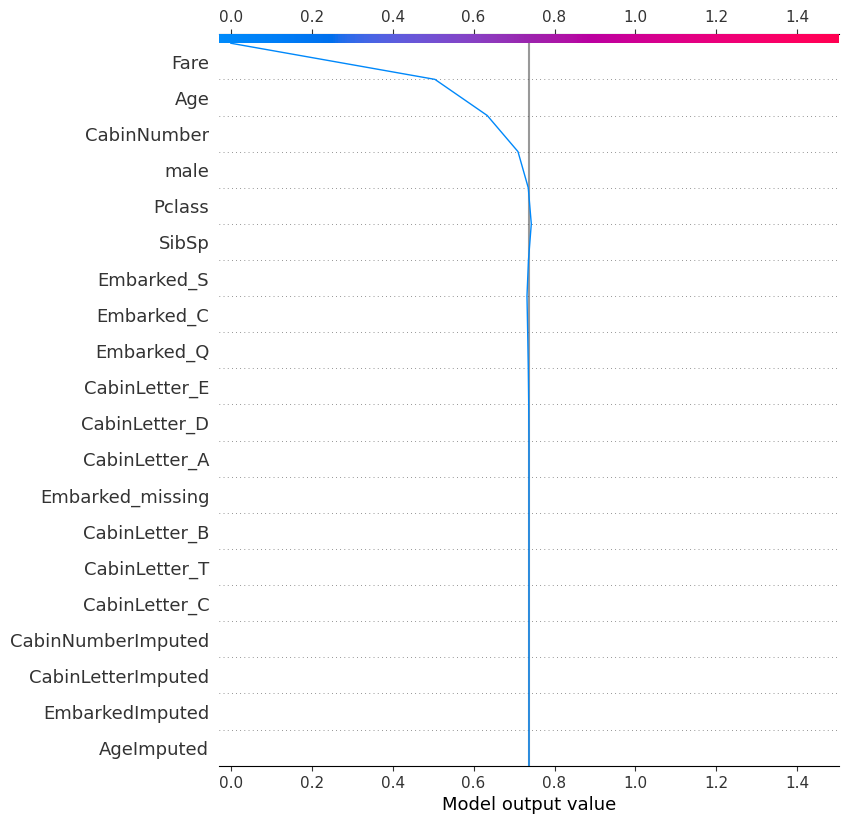

In [196]:
shap.plots.decision(
    explainer.expected_value,
    shap_values.values[103],
    feature_names=X.columns.tolist()
    )